In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Model, Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense, InputLayer
from tensorflow.python.keras.metrics import mean_squared_error
from tensorflow.python.keras.optimizers import gradient_descent_v2

from dataset.create_dataset import create_dataset


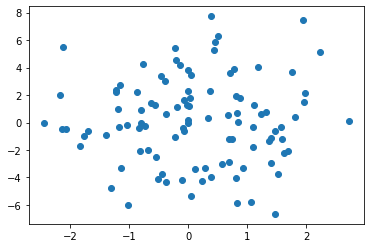

In [53]:
# X1, Y1 = create_dataset(nb=100)
# X2, Y2 = create_dataset(nb=100)
# X3, Y3 = create_dataset(nb=100)

# X, Y = pd.concat([X1, X2, X3]), pd.concat([Y1, Y2, Y3])

data = pd.read_csv('dataset/dataset.csv')
X, Y = data['X'], data['Y']

# X = np.linspace(0, 10, 100)
# Y = X + np.random.normal(0,1,100)

plt.scatter(X, Y)

In [54]:
# (x_train, x_test, y_train, y_test) = train_test_split(X.to_numpy(), Y.to_numpy(), train_size=0.75)
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, train_size=0.75)

In [55]:
model: Model = Sequential([
    InputLayer(input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer=gradient_descent_v2.SGD(learning_rate=0.01),
    loss='mean_squared_error',)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_split = 0.2,
    # callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

Epoch 1/100
2/2 [==============================] - 0s 43ms/step - loss: 10.1625 - val_loss: 11.5786
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 10.0996 - val_loss: 11.5837
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 10.0457 - val_loss: 11.5877
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 10.0089 - val_loss: 11.5965
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 9.9586 - val_loss: 11.6030
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 9.9296 - val_loss: 11.6069
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 9.8949 - val_loss: 11.6135
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 9.8681 - val_loss: 11.6192
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 9.8448 - val_loss: 11.6259
Epoch 10/100
2/2 [==============================] - 0s 63ms/step - loss: 9.8298 - val_loss: 11.6309
Epoch

In [64]:
x_lin = tf.linspace(min(x_train), max(x_train), len(X))
y_lin = model.predict(x_lin)

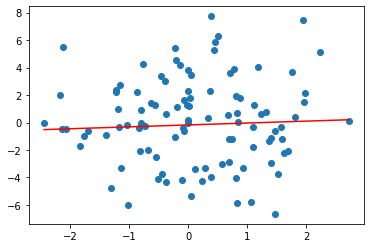

In [65]:
plt.scatter(X, Y)
plt.plot(x_lin, y_lin, color='red')
plt.show()

In [66]:
model.get_weights()

[array([[0.13868032]], dtype=float32), array([-0.17711891], dtype=float32)]

In [67]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 9.0711


9.071096420288086

In [68]:
y_pred = model.predict(x_test)

In [69]:
mean_squared_error(
    pd.DataFrame(y_test), pd.DataFrame(y_pred)
)

<tf.Tensor: shape=(26,), dtype=float32, numpy=
array([2.29150372e+01, 2.27388096e+00, 3.38720822e+00, 1.21324987e+01,
       2.91588879e+01, 3.11440080e-01, 4.46269417e+01, 5.96788454e+00,
       2.52728672e+01, 3.06156486e-01, 1.08113270e+01, 1.93730831e+01,
       6.73399544e+00, 5.63811004e-01, 4.30970162e-04, 1.61699543e+01,
       1.88542342e+00, 8.58632088e+00, 1.69348168e+00, 1.06177375e-01,
       3.84291440e-01, 7.03288913e-01, 1.56305585e-04, 1.60348091e+01,
       1.61514595e-01, 6.28763580e+00], dtype=float32)>